# Make density plots with velocity fields in the xy, xz and zy plane

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import tqdm
#import scienceplots

import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')

import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa
#from scipy.io import FortranFile as ff
import astropy.units as u
from astropy.constants import M_sun

sys.path.append('my_funcs/')
from plot_funcs import plot_density, plot_velocity

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

In [2]:
# Create directory containing the snapshots
snaps = {}
i_snap = 710; f_snap = 711 + 1
for io in range(i_snap, f_snap):
    sn = dis.snapshot(io,'my_core_13restart')
    snaps[io] = sn
    print(io, sn.time)

710 0.0009760000000000107
711 0.0009780000000000108


In [3]:
sn = snaps[710]
star_pos = sn.sinks[13][0].position; print(star_pos)
sn = snaps[711]

[ 0.19190217 -0.43587494  0.28830719]


In [4]:
ds = 0.5**20
w = 300
size = w * ds
extent = size * sn.scaling.l / sn.cgs.au; print(extent,'AU')
cgs_time = sn.scaling.t / sn.cgs.yr
cgs_length = sn.scaling.l / sn.cgs.au
kms_velocity = (sn.scaling.l / sn.scaling.t) / 1e3
cgs_density = ((sn.scaling.m/sn.cgs.m_sun) / (sn.scaling.l / sn.cgs.au)**3) / (M_sun.to('kg').value / u.au**3).to('cm**(-3)').value; print(cgs_density)
cgs_density = sn.scaling.d / 0.001; print(cgs_density)
print(sn.scaling.d), print( (sn.scaling.m) / (sn.scaling.l)**3 )
print(sn.time *cgs_time)

236.07264228045622 AU
9.03259185467041e-06
3.187e-18
3.187e-21
3.187e-21
21255.19476540918


In [5]:
ff = dse.amr2raw(sn, center = star_pos, width = w, verbose = 1, lmax = 20, lmin = 15, ivs = 'd')
ux =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 1, lmax = 20, lmin = 15, ivs = 'ux')
uy =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 1, lmax = 20, lmin = 15, ivs = 'uy')
uz =  dse.amr2raw(sn, center = star_pos, width = w, verbose = 1, lmax = 20, lmin = 15, ivs = 'uz')

variable list: ['d']
 11.7s for 1812 patches
writing raw file paraview300.raw
variable list: ['ux']
 10.3s for 1812 patches
writing raw file paraview300.raw
variable list: ['uy']
 10.3s for 1812 patches
writing raw file paraview300.raw
variable list: ['uz']
 10.4s for 1812 patches
writing raw file paraview300.raw


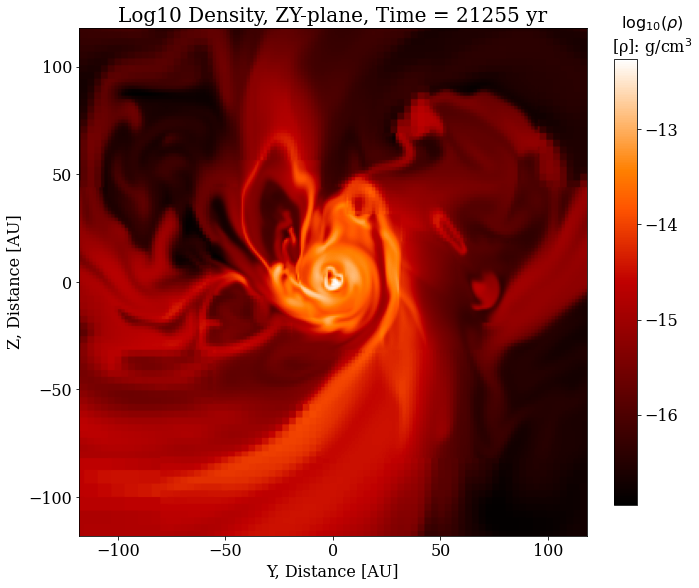

In [6]:
plot_density(ff, w, sn)

## 1D density plots from the core

In [7]:
# Create directory containing the snapshots
snaps = {}
i_snap = 223; f_snap = 323 + 1
for io in range(i_snap, f_snap, 25):
    sn = dis.snapshot(io,'my_core_13fixed')
    snaps[io] = sn
    print(io, sn.time * cgs_time)

223 86.93331192396296
248 2260.266110023037
273 4433.598908122107
298 6606.931706221174
323 8780.264504320243


In [8]:
sn = snaps[223]
sn.sinks[13][0].position

array([ 0.19189545, -0.43587536,  0.28831123])

In [9]:
w = 100
ds = 0.5**15
size = w * ds
extent = size * sn.scaling.l / sn.cgs.au; print(extent,'AU')
mean_dens = {}
time = np.zeros(len(snaps))

x = np.linspace(-extent/2, extent/2, w)
y = np.linspace(-extent/2, extent/2, w)
z = np.linspace(-extent/2, extent/2, w)
XX, YY, ZZ = np.meshgrid(x, y, z)
distances = np.sqrt(XX**2 + YY**2 + ZZ**2)
dist_star = np.linspace(30, 2600, 20)


2518.108184324866 AU


22.027733910129438 2180.745657102842


array([  30.        ,  165.26315789,  300.52631579,  435.78947368,
        571.05263158,  706.31578947,  841.57894737,  976.84210526,
       1112.10526316, 1247.36842105, 1382.63157895, 1517.89473684,
       1653.15789474, 1788.42105263, 1923.68421053, 2058.94736842,
       2194.21052632, 2329.47368421, 2464.73684211, 2600.        ])

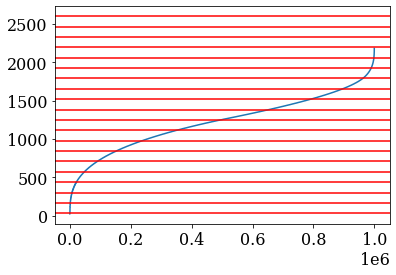

In [10]:
plt.plot(np.sort(distances.flatten()))
print(distances.min(),distances.max())
for r in dist_star:
    plt.axhline(r, c = 'r')
dist_star

In [11]:

for i, s in (enumerate(snaps.keys())):
    try:
        star_pos = snaps[s].sinks[13][0].position
    except:
        pass
    low_res_density = dse.amr2raw(snaps[s], center = star_pos, width = w, verbose = 0, lmax = 15, lmin = 10, ivs = 'd')
    print(np.mean(low_res_density))
    time[i] = snaps[s].time
    prev_r = 0; mean = np.zeros_like(dist_star)
    
    for i, r in enumerate(dist_star):
        mask = np.ma.masked_values(((distances <= r) & (distances > prev_r)), distances)
     
        mean[i] = np.nanmean(low_res_density[mask])
        prev_r = r
    mean_dens[s] = mean
    print(f'Done with snapshot{s}')

3682.5051720396727
Done with snapshot223


/tmp/ipykernel_85461/2502803843.py:14: RuntimeWarning: Mean of empty slice
  mean[i] = np.nanmean(low_res_density[mask])


3520.638107219551
Done with snapshot248
3485.5945840411223
Done with snapshot273
3458.8959863907967
Done with snapshot298
3518.6866855537223
Done with snapshot323


In [12]:
dist_star2 = dist_star - 0.5 * np.diff(dist_star)[0]
dist_star2[0] = 15
dist_star2

array([  15.        ,   97.63157895,  232.89473684,  368.15789474,
        503.42105263,  638.68421053,  773.94736842,  909.21052632,
       1044.47368421, 1179.73684211, 1315.        , 1450.26315789,
       1585.52631579, 1720.78947368, 1856.05263158, 1991.31578947,
       2126.57894737, 2261.84210526, 2397.10526316, 2532.36842105])

## Spherical isothermal Bonnor–Ebert density: 
#### $$\rho\propto r^{-2}$$

223
248
273
298
323


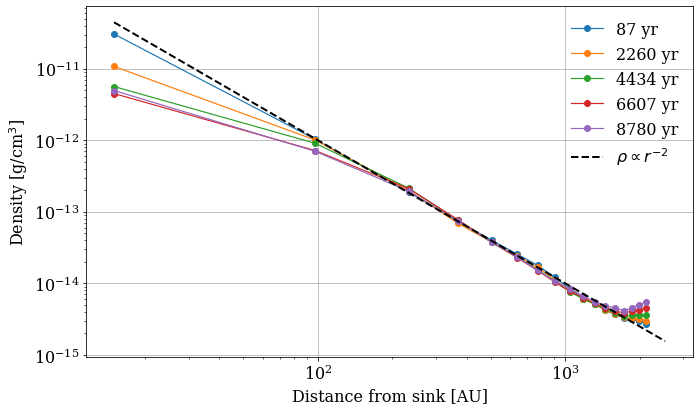

In [13]:
#import scienceplots

#plt.style.use(['science','no-latex'])
fig, axs = plt.subplots(figsize = (10,6))
plt.grid()
#axs.tick_params(width = 1.5, which = 'major', length = 5)
#axs.tick_params(width = 1, which = 'minor')

for i, key in enumerate(snaps.keys()):
    print(key)
    axs.loglog(dist_star2, mean_dens[key] * cgs_density ,'-', marker = 'o', label = f'{time[i] * cgs_time:2.0f} yr', lw = 1.2)

axs.loglog(dist_star2, 10**(-8)*dist_star2**(-2), label = '$ρ\propto r^{-2}$', ls = '--', c = 'black', lw = 2)

axs.set( ylabel = 'Density [g/cm$^{3}$]', xlabel = 'Distance from sink [AU]')
plt.legend(frameon = False)
plt.tight_layout()

# Creating density plot from patch data

## $$\langle\rho\rangle=  \frac{\int\rho dV}{\int dV}\approx\sum_{cell}  \frac{\rho \Delta V}{\sum_{\Delta v}}$$
## $$\langle\rho^2\rangle= \frac{\int\rho^2 dV}{\int dV}\approx\sum_{cell}  \frac{\rho^2 \Delta V}{\sum_{\Delta v}}$$
## $$Var(X) = \langle X^2 \rangle - \langle X \rangle^2$$

In [14]:
sn = snaps[223]
print(sn.time * cgs_time)
star_pos = sn.sinks[13][0].position
dist = lambda dist1, dist2: np.sqrt(np.sum((dist1 - dist2)**2))
distance = 1e4 / cgs_length

pp = [p for p in sn.patches if dist(p.position, star_pos) < distance]
#pp_id = [p.id for p in sn.patches if dist(p.position, star_pos) < distance]
#print(len(pp), len(pp_id))

86.93331192396296


In [15]:
log_r = np.logspace(1, 4, 200)
code_Ur = log_r / cgs_length
densities = []
dens_2 = []
evaluted_r = []
sigma_rho = []
prev_r = 0 
for i, r in enumerate(code_Ur):
    pp_radius = [p for p in pp if  dist(p.position, star_pos) < r and  dist(p.position, star_pos) > prev_r]
    N = len(pp_radius)
    if len(pp_radius) <= 1:
        continue
    else:
        shell_mass = 0
        shell_vol = 0
        rho_2 = 0
        rho_i = np.zeros(N)
        for i, p in enumerate(pp_radius):
            rho_i[i] = p.var('d').mean()
            shell_vol += np.prod(p.size)
            shell_mass += p.var('d').mean() * np.prod(p.size)
            rho_2 += p.var('d').mean()**2 * np.prod(p.size)
        dens_2.append(rho_2 / shell_vol)
        sigma_rho.append(np.sqrt(np.sum((rho_i - (shell_mass / shell_vol))**2) / (N - 1)))
        densities.append(shell_mass / shell_vol)
        evaluted_r.append(r - 0.5 * (r - prev_r))
        prev_r = r
dens_2 = np.array(dens_2) * cgs_density**2
#This cell now takes 7.4s to run
evaluted_r = np.array(evaluted_r) * cgs_length
densities = np.array(densities) * cgs_density 
sigma_rho2 = np.array(np.sqrt(dens_2 - densities**2)) 
sigma_rho = np.array(sigma_rho) * cgs_density

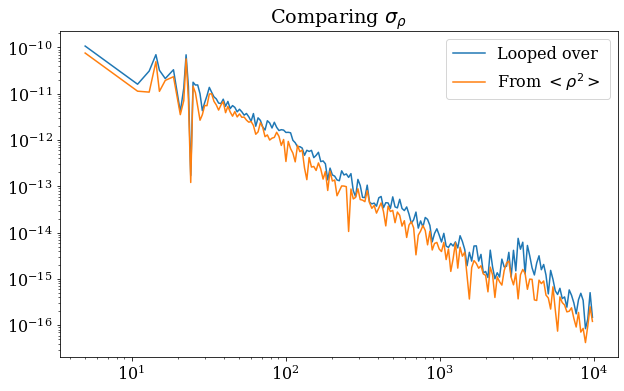

In [16]:
fig, axs = plt.subplots(figsize = (10, 6))

axs.loglog(evaluted_r, sigma_rho, label = 'Looped over ')
axs.loglog(evaluted_r, sigma_rho2, label = 'From $<ρ^2>$')
#axs.loglog(evaluted_r, densities, color = 'black')
axs.set(title = 'Comparing $σ_ρ$')

plt.legend()

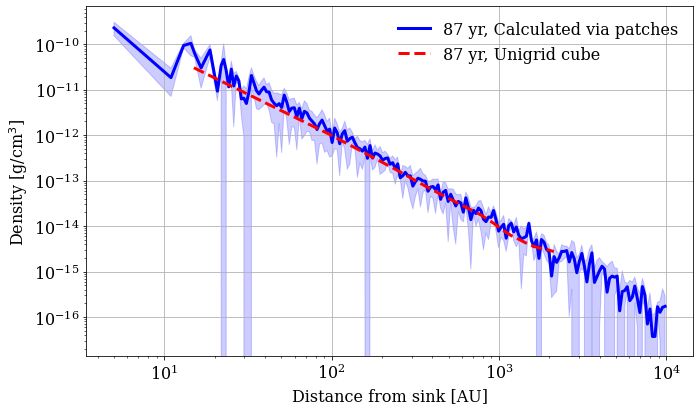

In [17]:
fig, axs = plt.subplots(figsize = (10,6))
plt.grid()

axs.loglog(evaluted_r, densities , '-', label = f'{sn.time * cgs_time:2.0f} yr, Calculated via patches', lw = 3, color = 'blue')
axs.fill_between(evaluted_r, densities - sigma_rho2, densities + sigma_rho2, color = 'blue', alpha = 0.2)

axs.loglog(dist_star2, mean_dens[223] * cgs_density ,'--',  label = f'{sn.time * cgs_time:2.0f} yr, Unigrid cube', lw = 3, color = 'red')

#axs.loglog(log_r, 10**(-8)*log_r**(-2), label = '$ρ\propto r^{-2}$', ls = '--', c = 'black', lw = 2)

axs.set( ylabel = 'Density [g/cm$^{3}$]', xlabel = 'Distance from sink [AU]')
plt.legend(frameon = False)
plt.tight_layout()